## Face & Eye Detection using HAAR Cascade Classifiers

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('image.jpg')

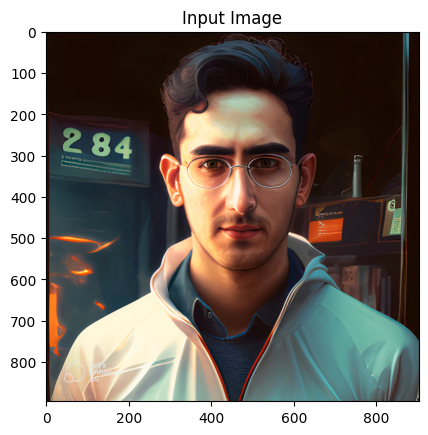

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.show()

In [4]:
# We point OpenCV's CascadeClassifier function to where our classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\G oo G le\AppData\Local\Temp\ipykernel_15320\515836896.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


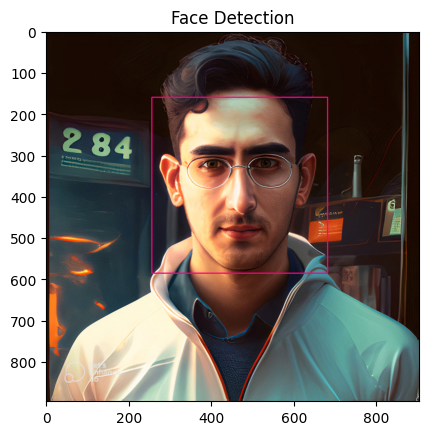

In [5]:
# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.show()

### Let's combine face and eye detection

In [6]:
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\G oo G le\AppData\Local\Temp\ipykernel_15320\1669040385.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\G oo G le\AppData\Local\Temp\ipykernel_15320\1669040385.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if eyes is ():


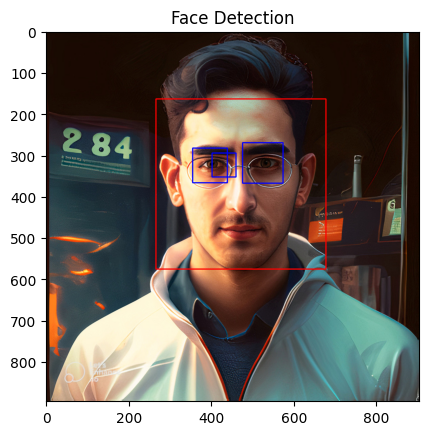

In [7]:
# Read image
image = cv2.imread('image.jpg')

# Convert frame to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# tuning cascade classifiers
faces = face_classifier.detectMultiScale(gray_img)
eyes = eye_classifier.detectMultiScale(gray_img)

# face detection
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 0, 255), 2)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# eye detection
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(image, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2) 

# When no faces detected, face_classifier returns and empty tuple
if eyes is ():
    print("No eyes found")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Face Detection')

plt.show()

### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  
